# Bioclim Vars

BIO1 = Annual Mean Temperature

BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))

BIO3 = Isothermality (BIO2/BIO7) (×100)

BIO4 = Temperature Seasonality (standard deviation ×100)

BIO5 = Max Temperature of Warmest Month

BIO6 = Min Temperature of Coldest Month

BIO7 = Temperature Annual Range (BIO5-BIO6)

BIO8 = Mean Temperature of Wettest Quarter

BIO9 = Mean Temperature of Driest Quarter

BIO10 = Mean Temperature of Warmest Quarter

BIO11 = Mean Temperature of Coldest Quarter

BIO12 = Annual Precipitation

BIO13 = Precipitation of Wettest Month

BIO14 = Precipitation of Driest Month

BIO15 = Precipitation Seasonality (Coefficient of Variation)

BIO16 = Precipitation of Wettest Quarter

BIO17 = Precipitation of Driest Quarter

BIO18 = Precipitation of Warmest Quarter

BIO19 = Precipitation of Coldest Quarter

## Installing and downloading packages

In [14]:
#pip install rasterio
#!pip install geopandas
#!pip install shapely


#pip install  basemap basemap-data-hires
#!pip install geopandas contextily

In [40]:
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

## Bioclim 1 - Annual Mean Temperature

In [2]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_1.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_{i+1}'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio1 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


In [3]:
gdfbio1

x          y     bioclim_1                     geometry
0       -179.916667  89.916667 -3.400000e+38  POINT (-179.91667 89.91667)
1       -179.750000  89.916667 -3.400000e+38     POINT (-179.75 89.91667)
2       -179.583333  89.916667 -3.400000e+38  POINT (-179.58333 89.91667)
3       -179.416667  89.916667 -3.400000e+38  POINT (-179.41667 89.91667)
4       -179.250000  89.916667 -3.400000e+38     POINT (-179.25 89.91667)
...             ...        ...           ...                          ...
2332795  179.250000 -89.916667 -3.281009e+01     POINT (179.25 -89.91667)
2332796  179.416667 -89.916667 -3.281202e+01  POINT (179.41667 -89.91667)
2332797  179.583333 -89.916667 -3.281291e+01  POINT (179.58333 -89.91667)
2332798  179.750000 -89.916667 -3.281253e+01     POINT (179.75 -89.91667)
2332799  179.916667 -89.916667 -3.162033e+01  POINT (179.91667 -89.91667)

[2332800 rows x 4 columns]

In [4]:
# Load Africa shapefile (you need to have this file)
africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio1 = africa_shp.to_crs(gdfbio1.crs)

# Spatial join to keep only points within Africa
africa_bio1 = gpd.sjoin(gdfbio1, africa_shp, how="inner", predicate="within")

print(africa_bio1.head())

               x          y  bioclim_1                  geometry  index_right  \
683696  9.416667  37.250000  17.332106     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000  17.319548     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  17.591606        POINT (9.75 37.25)           51   
683699  9.916667  37.250000  17.751139     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333  14.855284  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


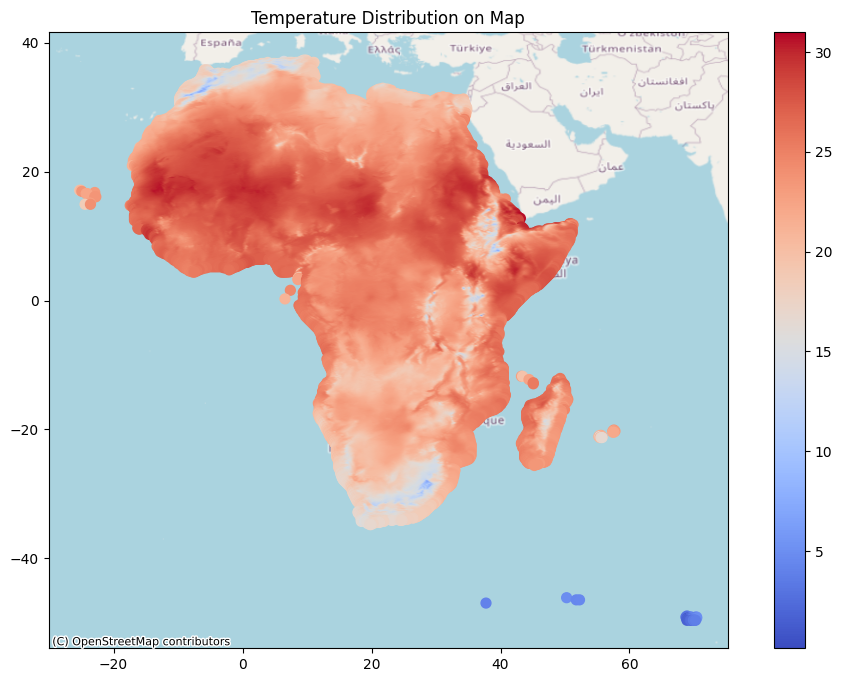

In [5]:
# Convert DataFrame to GeoDataFrame
gdfbio1 = gpd.GeoDataFrame(africa_bio1, geometry=gpd.points_from_xy(africa_bio1['x'], africa_bio1['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio1.set_crs(epsg=4326, inplace=True)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio1.plot(column='bioclim_1', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title('Temperature Distribution on Map')

# Show the plot
plt.show()

In [36]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

In [35]:
# # Create a figure and a map
# plt.figure(figsize=(15, 9))
# m = Basemap(projection='merc', 
#             llcrnrlat=african_points['x'].min() - 10, urcrnrlat=african_points['x'].max() + 10,
#             llcrnrlon=african_points['y'].min() - 10, urcrnrlon=african_points['y'].max() + 10,
#             resolution='i')

# # Draw coastlines, countries, and states
# m.drawcoastlines()
# m.drawcountries()
# m.drawstates()

# # Convert lat/long to map projection coordinates
# x, y = m(african_points['x'].values, african_points['y'].values)

# # Plot data
# sc = m.scatter(x, y, c=african_points['bioclim_1'], cmap='coolwarm', marker='o', edgecolor='k', alpha=0.01)

# # Add a colorbar
# cbar = m.colorbar(sc, location='right', pad='10%')
# cbar.set_label('Temperature (°C)')

## Bioclim 2

In [9]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_2.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_2'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio2 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


In [10]:
# Load Africa shapefile (you need to have this file)
africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio2 = africa_shp.to_crs(gdfbio2.crs)

# Spatial join to keep only points within Africa
africa_bio2 = gpd.sjoin(gdfbio2, africa_shp, how="inner", predicate="within")

print(africa_bio2.head())

               x          y  bioclim_2                  geometry  index_right  \
683696  9.416667  37.250000   9.906027     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000   9.932011     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  10.155241        POINT (9.75 37.25)           51   
683699  9.916667  37.250000   9.605694     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333   8.431959  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


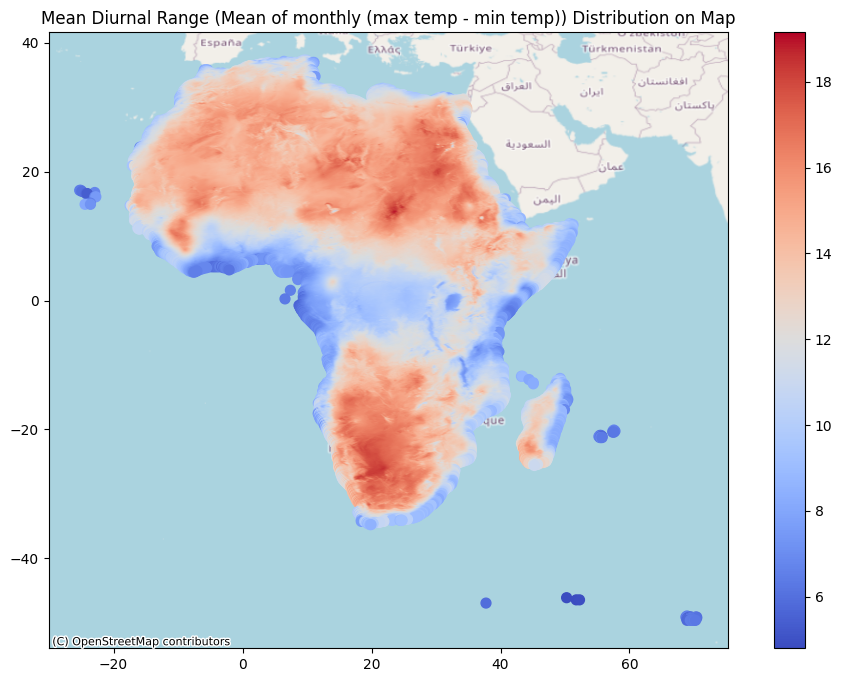

In [14]:
# Convert DataFrame to GeoDataFrame
gdfbio2 = gpd.GeoDataFrame(africa_bio2, geometry=gpd.points_from_xy(africa_bio2['x'], africa_bio2['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio2.set_crs(epsg=4326, inplace=True)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio2.plot(column='bioclim_2', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio2.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title('Mean Diurnal Range (Mean of monthly (max temp - min temp)) Distribution on Map')

# Show the plot
plt.show()

## Bioclim 3 - Isothermality (BIO2/BIO7) (×100)

               x          y  bioclim_2                  geometry  index_right  \
683696  9.416667  37.250000   9.906027     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000   9.932011     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  10.155241        POINT (9.75 37.25)           51   
683699  9.916667  37.250000   9.605694     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333   8.431959  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


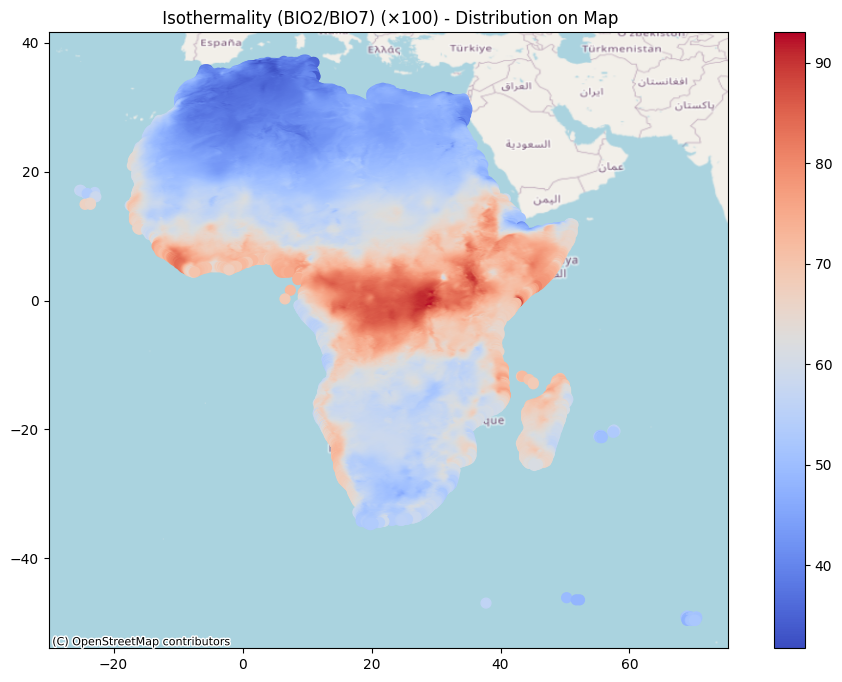

In [15]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_3.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_3'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio3 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio3 = africa_shp.to_crs(gdfbio3.crs)

# Spatial join to keep only points within Africa
africa_bio3 = gpd.sjoin(gdfbio3, africa_shp, how="inner", predicate="within")

print(africa_bio2.head())

# Convert DataFrame to GeoDataFrame
gdfbio3 = gpd.GeoDataFrame(africa_bio3, geometry=gpd.points_from_xy(africa_bio3['x'], africa_bio3['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio3.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio3.plot(column='bioclim_3', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio3.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Isothermality (BIO2/BIO7) (×100) - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 4 - Temperature Seasonality (standard deviation ×100)

               x          y   bioclim_4                  geometry  \
683696  9.416667  37.250000  554.249756     POINT (9.41667 37.25)   
683697  9.583333  37.250000  562.568848     POINT (9.58333 37.25)   
683698  9.750000  37.250000  566.213318        POINT (9.75 37.25)   
683699  9.916667  37.250000  553.011414     POINT (9.91667 37.25)   
685838  6.416667  37.083333  516.093933  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


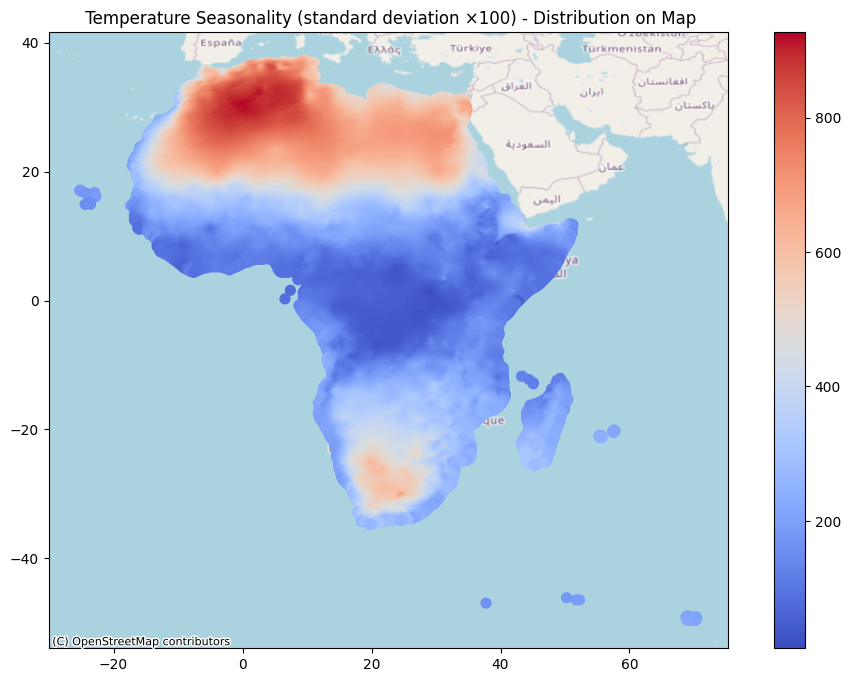

In [17]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_4.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_4'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio4 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio4 = africa_shp.to_crs(gdfbio4.crs)

# Spatial join to keep only points within Africa
africa_bio4 = gpd.sjoin(gdfbio4, africa_shp, how="inner", predicate="within")

print(africa_bio4.head())

# Convert DataFrame to GeoDataFrame
gdfbio4 = gpd.GeoDataFrame(africa_bio4, geometry=gpd.points_from_xy(africa_bio4['x'], africa_bio4['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio4.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio4.plot(column='bioclim_4', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio4.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Temperature Seasonality (standard deviation ×100) - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 5 - Max Temperature of Warmest Month

               x          y  bioclim_5                  geometry  index_right  \
683696  9.416667  37.250000  30.900000     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000  31.214970     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  31.818840        POINT (9.75 37.25)           51   
683699  9.916667  37.250000  31.353416     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333  27.339176  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


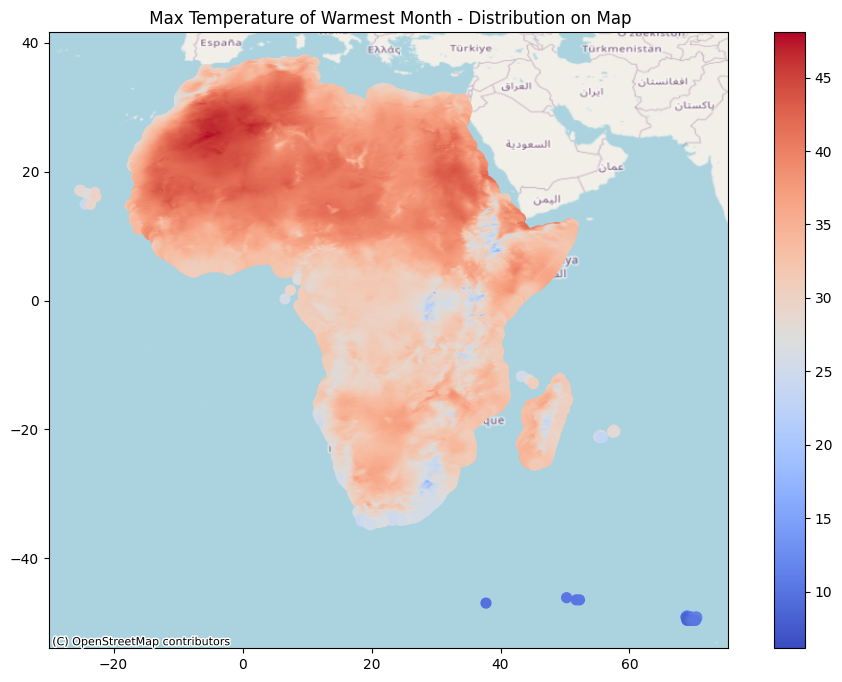

In [18]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_5.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_5'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio5 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio5 = africa_shp.to_crs(gdfbio5.crs)

# Spatial join to keep only points within Africa
africa_bio5 = gpd.sjoin(gdfbio5, africa_shp, how="inner", predicate="within")

print(africa_bio5.head())

# Convert DataFrame to GeoDataFrame
gdfbio5 = gpd.GeoDataFrame(africa_bio5, geometry=gpd.points_from_xy(africa_bio5['x'], africa_bio5['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio5.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio5.plot(column='bioclim_5', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio5.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Max Temperature of Warmest Month - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 6 - Min Temperature of Coldest Month

               x          y  bioclim_6                  geometry  index_right  \
683696  9.416667  37.250000   6.338393     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000   6.363173     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000   6.632753        POINT (9.75 37.25)           51   
683699  9.916667  37.250000   7.065217     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333   5.042268  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


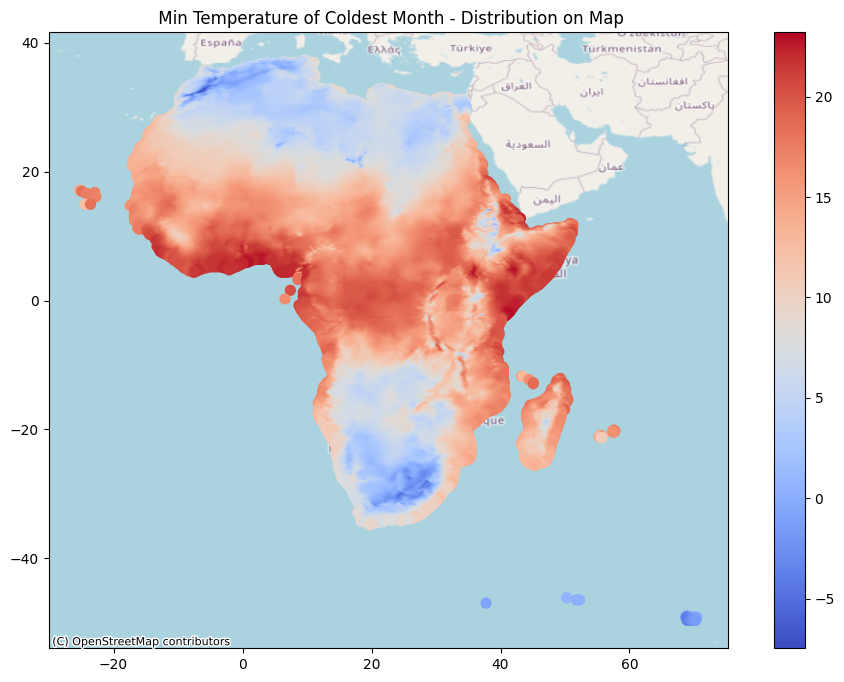

In [19]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_6.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_6'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio6 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio6 = africa_shp.to_crs(gdfbio6.crs)

# Spatial join to keep only points within Africa
africa_bio6 = gpd.sjoin(gdfbio6, africa_shp, how="inner", predicate="within")

print(africa_bio6.head())

# Convert DataFrame to GeoDataFrame
gdfbio6 = gpd.GeoDataFrame(africa_bio6, geometry=gpd.points_from_xy(africa_bio6['x'], africa_bio6['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio6.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio6.plot(column='bioclim_6', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio6.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Min Temperature of Coldest Month - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 7 - Temperature Annual Range (BIO5-BIO6)

               x          y  bioclim_6                  geometry  index_right  \
683696  9.416667  37.250000   6.338393     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000   6.363173     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000   6.632753        POINT (9.75 37.25)           51   
683699  9.916667  37.250000   7.065217     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333   5.042268  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


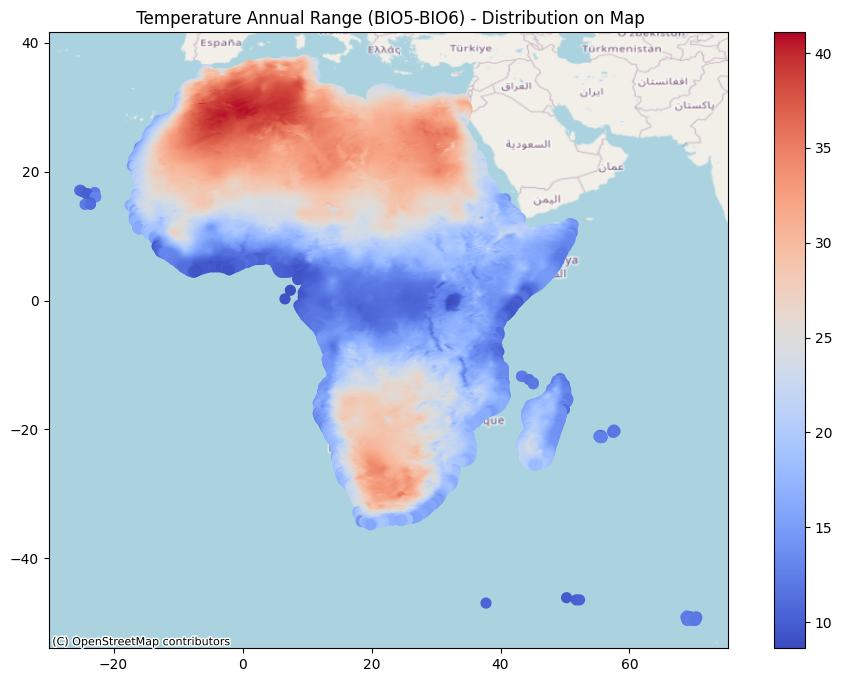

In [21]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_7.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_7'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio7 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio7 = africa_shp.to_crs(gdfbio7.crs)

# Spatial join to keep only points within Africa
africa_bio7 = gpd.sjoin(gdfbio7, africa_shp, how="inner", predicate="within")

print(africa_bio6.head())

# Convert DataFrame to GeoDataFrame
gdfbio7 = gpd.GeoDataFrame(africa_bio7, geometry=gpd.points_from_xy(africa_bio7['x'], africa_bio7['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio7.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio7.plot(column='bioclim_7', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio7.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Temperature Annual Range (BIO5-BIO6) - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 8 - Mean Temperature of Wettest Quarter

               x          y  bioclim_8                  geometry  index_right  \
683696  9.416667  37.250000  11.111235     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000  11.065768     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  12.656618        POINT (9.75 37.25)           51   
683699  9.916667  37.250000  12.964596     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333  10.351975  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


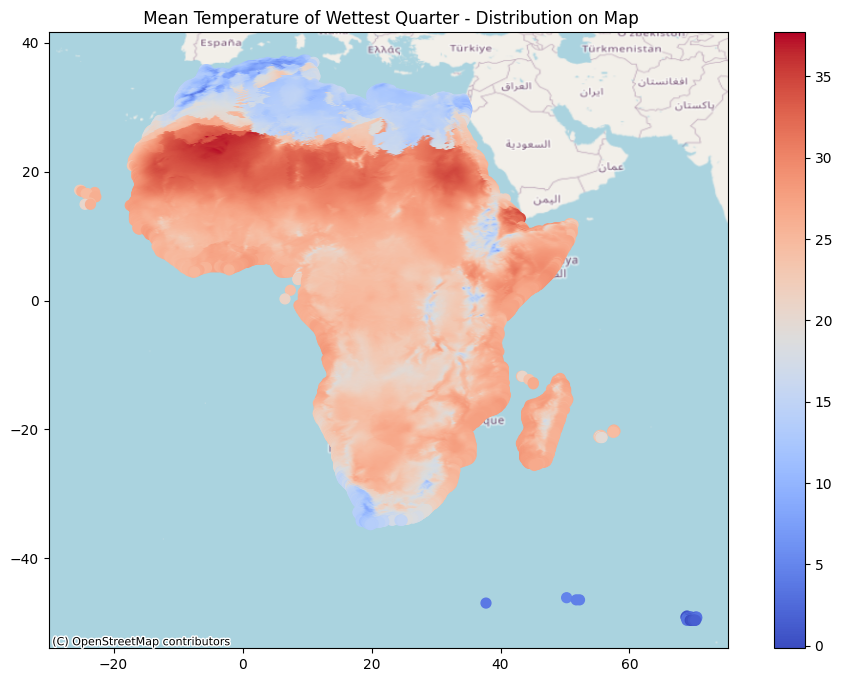

In [23]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_8.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_8'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio8 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio8 = africa_shp.to_crs(gdfbio8.crs)

# Spatial join to keep only points within Africa
africa_bio8 = gpd.sjoin(gdfbio8, africa_shp, how="inner", predicate="within")

print(africa_bio8.head())

# Convert DataFrame to GeoDataFrame
gdfbio8 = gpd.GeoDataFrame(africa_bio8, geometry=gpd.points_from_xy(africa_bio8['x'], africa_bio8['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio8.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio8.plot(column='bioclim_8', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio8.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Mean Temperature of Wettest Quarter - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 9 - Mean of the Driest Quarter

               x          y  bioclim_9                  geometry  index_right  \
683696  9.416667  37.250000  24.127752     POINT (9.41667 37.25)           51   
683697  9.583333  37.250000  24.227345     POINT (9.58333 37.25)           51   
683698  9.750000  37.250000  24.531158        POINT (9.75 37.25)           51   
683699  9.916667  37.250000  24.518116     POINT (9.91667 37.25)           51   
685838  6.416667  37.083333  21.112114  POINT (6.41667 37.08333)           13   

        OBJECTID  ISO   NAME_0 Continent REgion  
683696        52  TUN  Tunisia    Africa   None  
683697        52  TUN  Tunisia    Africa   None  
683698        52  TUN  Tunisia    Africa   None  
683699        52  TUN  Tunisia    Africa   None  
685838        14  DZA  Algeria    Africa   None  


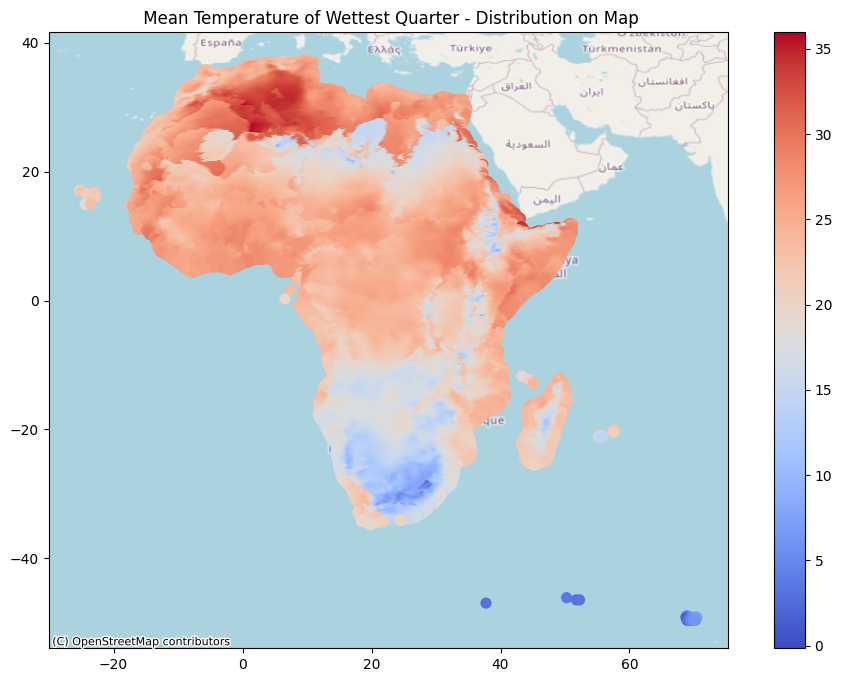

In [24]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_9.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_9'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio9 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio9 = africa_shp.to_crs(gdfbio9.crs)

# Spatial join to keep only points within Africa
africa_bio9 = gpd.sjoin(gdfbio9, africa_shp, how="inner", predicate="within")

print(africa_bio9.head())

# Convert DataFrame to GeoDataFrame
gdfbio9 = gpd.GeoDataFrame(africa_bio9, geometry=gpd.points_from_xy(africa_bio9['x'], africa_bio9['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio9.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio9.plot(column='bioclim_9', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio9.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Mean Temperature of Driest Quarter - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 10 - MEan Temperature of Warmest Quarter

               x          y  bioclim_10                  geometry  \
683696  9.416667  37.250000   24.407887     POINT (9.41667 37.25)   
683697  9.583333  37.250000   24.534481     POINT (9.58333 37.25)   
683698  9.750000  37.250000   24.902319        POINT (9.75 37.25)   
683699  9.916667  37.250000   24.909214     POINT (9.91667 37.25)   
685838  6.416667  37.083333   21.599485  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


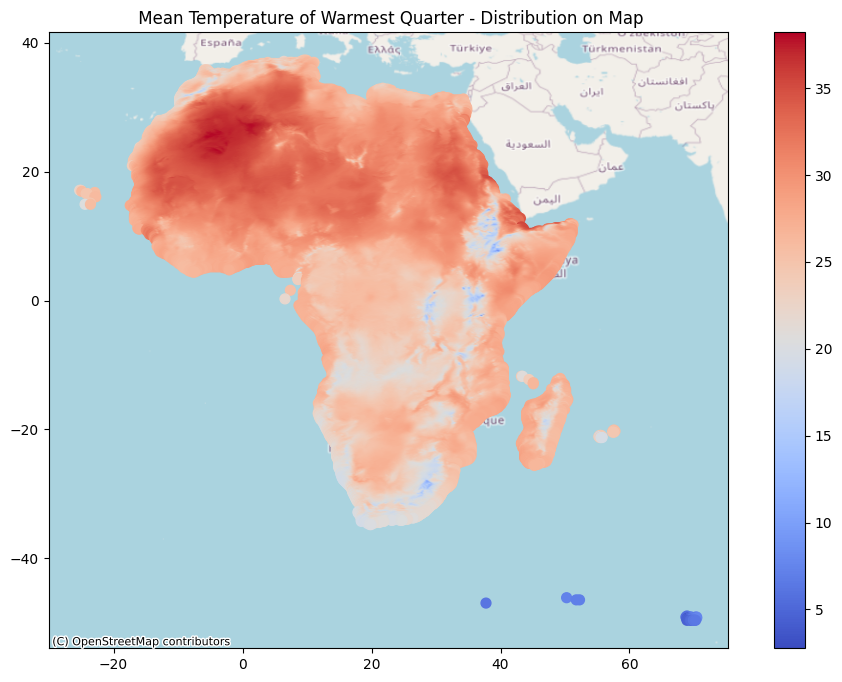

In [25]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_10.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_10'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio10 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio10 = africa_shp.to_crs(gdfbio10.crs)

# Spatial join to keep only points within Africa
africa_bio10 = gpd.sjoin(gdfbio10, africa_shp, how="inner", predicate="within")

print(africa_bio10.head())

# Convert DataFrame to GeoDataFrame
gdfbio10 = gpd.GeoDataFrame(africa_bio10, geometry=gpd.points_from_xy(africa_bio10['x'], africa_bio10['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio10.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio10.plot(column='bioclim_10', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio7.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Mean Temperature of Warmest Quarter - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 11 - Mean of the Coldest Quarter

               x          y  bioclim_11                  geometry  \
683696  9.416667  37.250000   11.111235     POINT (9.41667 37.25)   
683697  9.583333  37.250000   11.065768     POINT (9.58333 37.25)   
683698  9.750000  37.250000   11.355556        POINT (9.75 37.25)   
683699  9.916667  37.250000   11.663872     POINT (9.91667 37.25)   
685838  6.416667  37.083333    9.089089  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


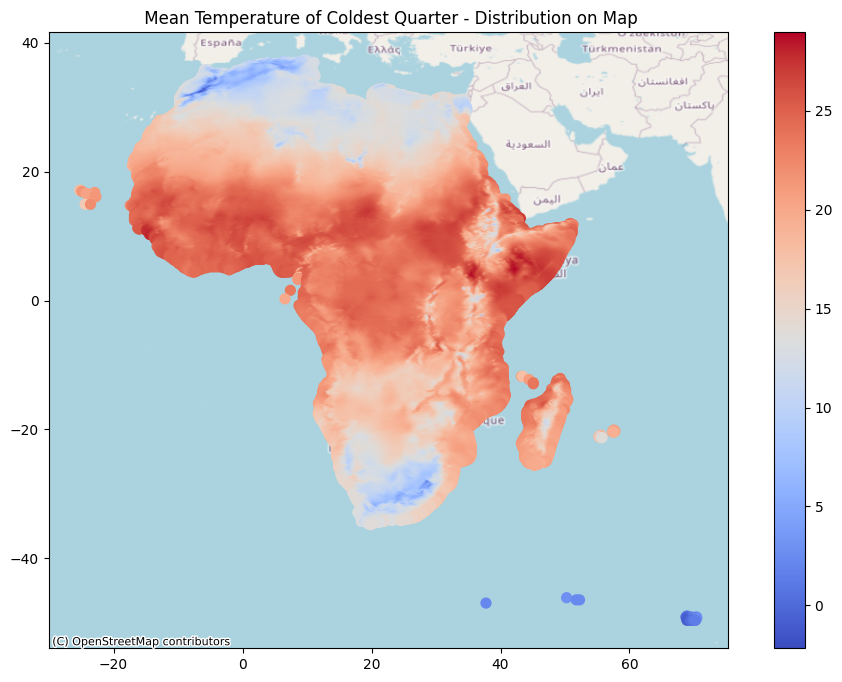

In [26]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_11.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_11'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio11 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio11 = africa_shp.to_crs(gdfbio11.crs)

# Spatial join to keep only points within Africa
africa_bio11 = gpd.sjoin(gdfbio11, africa_shp, how="inner", predicate="within")

print(africa_bio11.head())

# Convert DataFrame to GeoDataFrame
gdfbio11 = gpd.GeoDataFrame(africa_bio11, geometry=gpd.points_from_xy(africa_bio11['x'], africa_bio11['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio11.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio11.plot(column='bioclim_11', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio11.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Mean Temperature of Coldest Quarter - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 12 - Annual Precipitation

               x          y  bioclim_12                  geometry  \
683696  9.416667  37.250000       711.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000       677.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000       645.0        POINT (9.75 37.25)   
683699  9.916667  37.250000       599.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333      1339.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


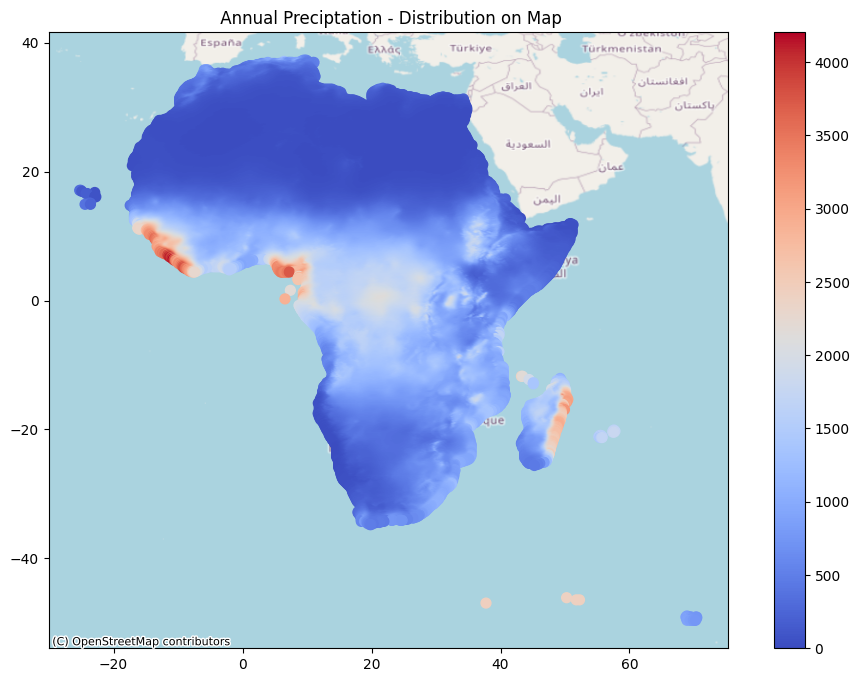

In [27]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_12.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_12'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio12 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio12 = africa_shp.to_crs(gdfbio12.crs)

# Spatial join to keep only points within Africa
africa_bio12 = gpd.sjoin(gdfbio12, africa_shp, how="inner", predicate="within")

print(africa_bio12.head())

# Convert DataFrame to GeoDataFrame
gdfbio12 = gpd.GeoDataFrame(africa_bio12, geometry=gpd.points_from_xy(africa_bio12['x'], africa_bio12['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio12.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio12.plot(column='bioclim_12', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio12.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Annual Preciptation - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 13 - Preciptation of the Wettest Month

               x          y  bioclim_13                  geometry  \
683696  9.416667  37.250000       111.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000       105.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000       100.0        POINT (9.75 37.25)   
683699  9.916667  37.250000        92.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333       237.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


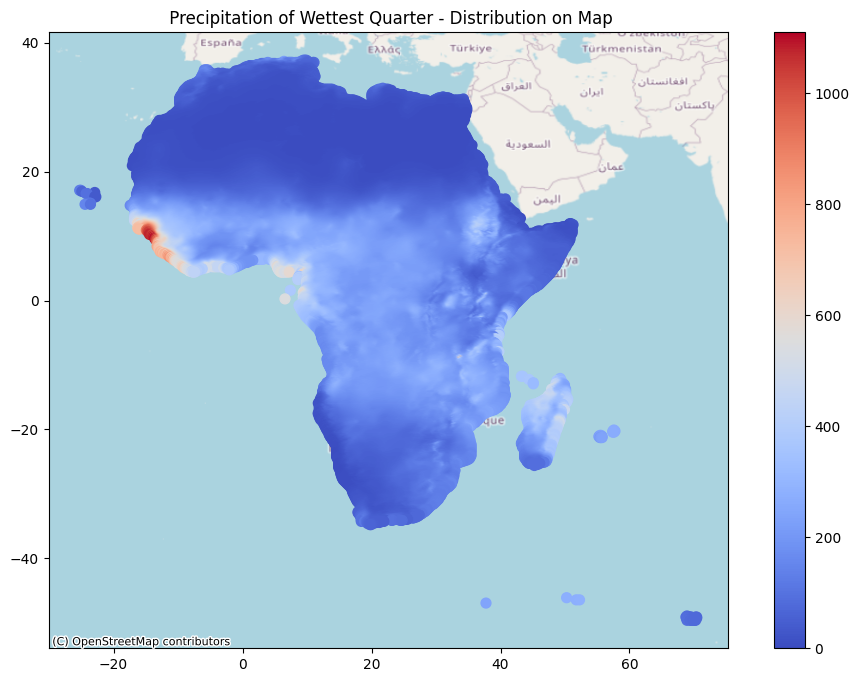

In [28]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_13.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_13'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio13 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio13 = africa_shp.to_crs(gdfbio13.crs)

# Spatial join to keep only points within Africa
africa_bio13 = gpd.sjoin(gdfbio13, africa_shp, how="inner", predicate="within")

print(africa_bio13.head())

# Convert DataFrame to GeoDataFrame
gdfbio13 = gpd.GeoDataFrame(africa_bio13, geometry=gpd.points_from_xy(africa_bio13['x'], africa_bio13['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio13.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio13.plot(column='bioclim_13', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio13.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation of Wettest Quarter - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 14 - Precipitation of the Driest Month

               x          y  bioclim_14                  geometry  \
683696  9.416667  37.250000         4.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000         4.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000         4.0        POINT (9.75 37.25)   
683699  9.916667  37.250000         3.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333         4.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


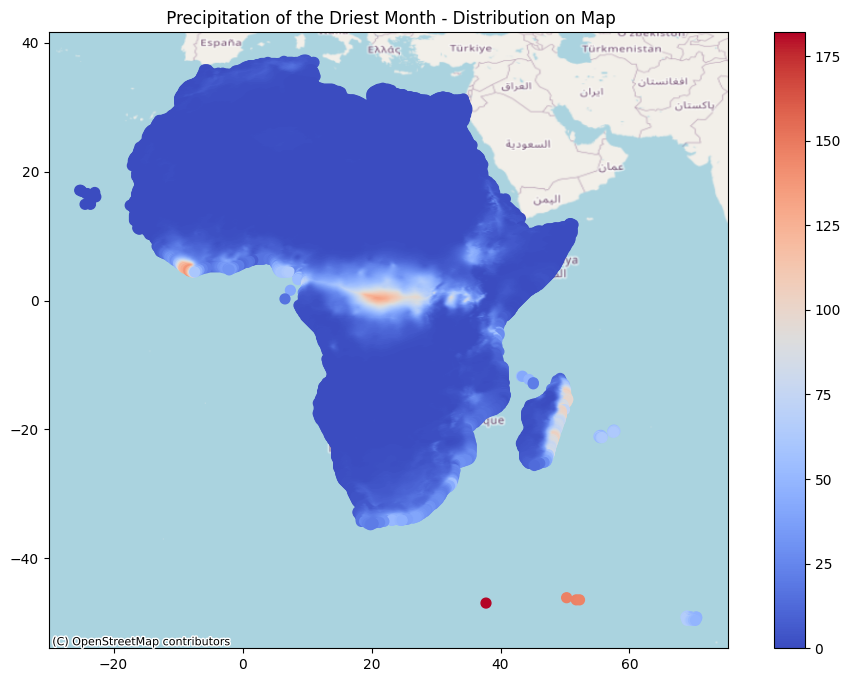

In [33]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_14.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_14'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio14 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio14 = africa_shp.to_crs(gdfbio14.crs)

# Spatial join to keep only points within Africa
africa_bio14 = gpd.sjoin(gdfbio14, africa_shp, how="inner", predicate="within")

print(africa_bio14.head())

# Convert DataFrame to GeoDataFrame
gdfbio14 = gpd.GeoDataFrame(africa_bio14, geometry=gpd.points_from_xy(africa_bio14['x'], africa_bio14['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio14.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio14.plot(column='bioclim_14', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio14.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation of the Driest Month - Distribution on Map')

# Show the plot
plt.show()

## Bioclim 15 - Precipitation Seasonality (Coefficient of Variation)

               x          y  bioclim_15                  geometry  \
683696  9.416667  37.250000   65.406235     POINT (9.41667 37.25)   
683697  9.583333  37.250000   64.769707     POINT (9.58333 37.25)   
683698  9.750000  37.250000   64.378998        POINT (9.75 37.25)   
683699  9.916667  37.250000   64.126213     POINT (9.91667 37.25)   
685838  6.416667  37.083333   72.732903  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


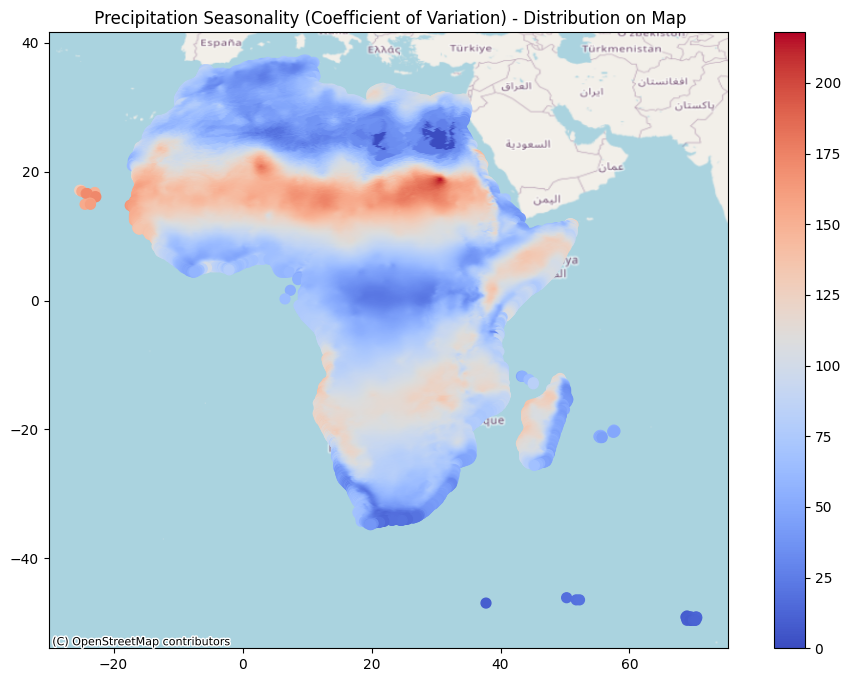

In [34]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_15.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_15'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio15 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio15 = africa_shp.to_crs(gdfbio15.crs)

# Spatial join to keep only points within Africa
africa_bio15 = gpd.sjoin(gdfbio15, africa_shp, how="inner", predicate="within")

print(africa_bio15.head())

# Convert DataFrame to GeoDataFrame
gdfbio15 = gpd.GeoDataFrame(africa_bio15, geometry=gpd.points_from_xy(africa_bio15['x'], africa_bio15['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio15.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio15.plot(column='bioclim_15', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio15.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation Seasonality (Coefficient of Variation) - Distribution on Map')

# Show the plot
plt.show()

# Bioclim 16 - Precipitation of the Wettest Quarter

               x          y  bioclim_16                  geometry  \
683696  9.416667  37.250000       315.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000       295.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000       278.0        POINT (9.75 37.25)   
683699  9.916667  37.250000       258.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333       658.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


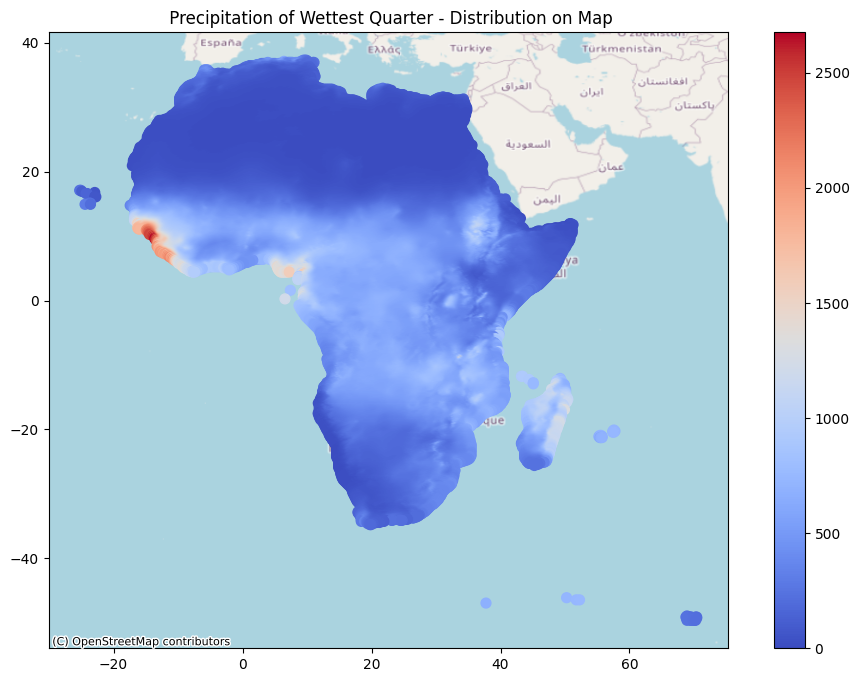

In [39]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_16.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_16'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio16 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio16 = africa_shp.to_crs(gdfbio16.crs)

# Spatial join to keep only points within Africa
africa_bio16 = gpd.sjoin(gdfbio16, africa_shp, how="inner", predicate="within")

print(africa_bio16.head())

# Convert DataFrame to GeoDataFrame
gdfbio16 = gpd.GeoDataFrame(africa_bio16, geometry=gpd.points_from_xy(africa_bio16['x'], africa_bio16['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio16.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio16.plot(column='bioclim_16', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio16.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation of Wettest Quarter - Distribution on Map')

# Show the plot
plt.show()

# Bioclim 17 - Precipitation of the Driest Quarter

               x          y  bioclim_17                  geometry  \
683696  9.416667  37.250000        24.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000        24.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000        23.0        POINT (9.75 37.25)   
683699  9.916667  37.250000        21.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333        45.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


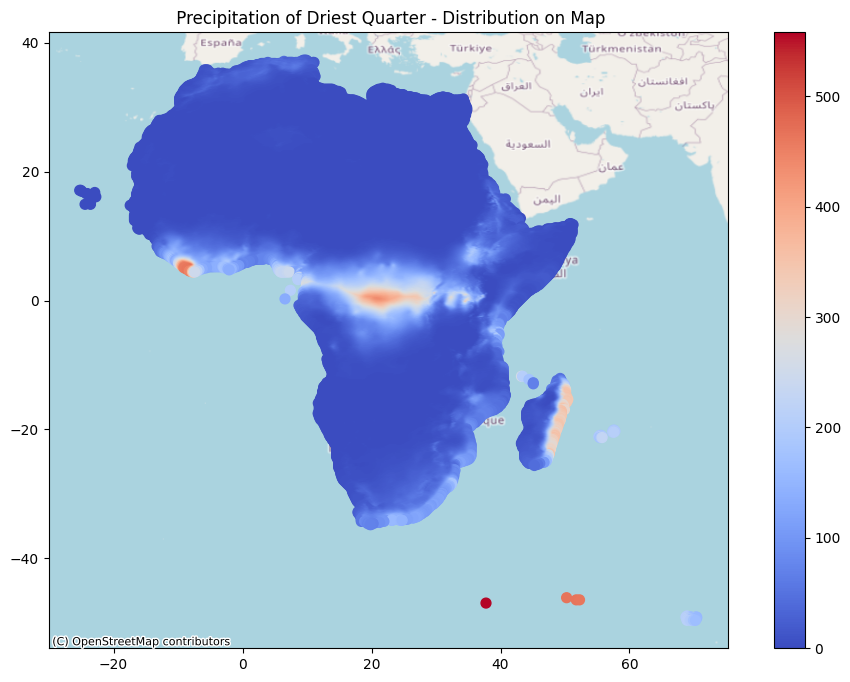

In [36]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_17.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_17'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio17 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio17 = africa_shp.to_crs(gdfbio17.crs)

# Spatial join to keep only points within Africa
africa_bio17 = gpd.sjoin(gdfbio17, africa_shp, how="inner", predicate="within")

print(africa_bio17.head())

# Convert DataFrame to GeoDataFrame
gdfbio17 = gpd.GeoDataFrame(africa_bio17, geometry=gpd.points_from_xy(africa_bio17['x'], africa_bio17['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio17.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio17.plot(column='bioclim_17', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio17.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation of Driest Quarter - Distribution on Map')

# Show the plot
plt.show()

# Bioclim 18 - Precipitation of the Warmest Quarter

               x          y  bioclim_18                  geometry  \
683696  9.416667  37.250000        49.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000        50.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000        50.0        POINT (9.75 37.25)   
683699  9.916667  37.250000        48.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333        75.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


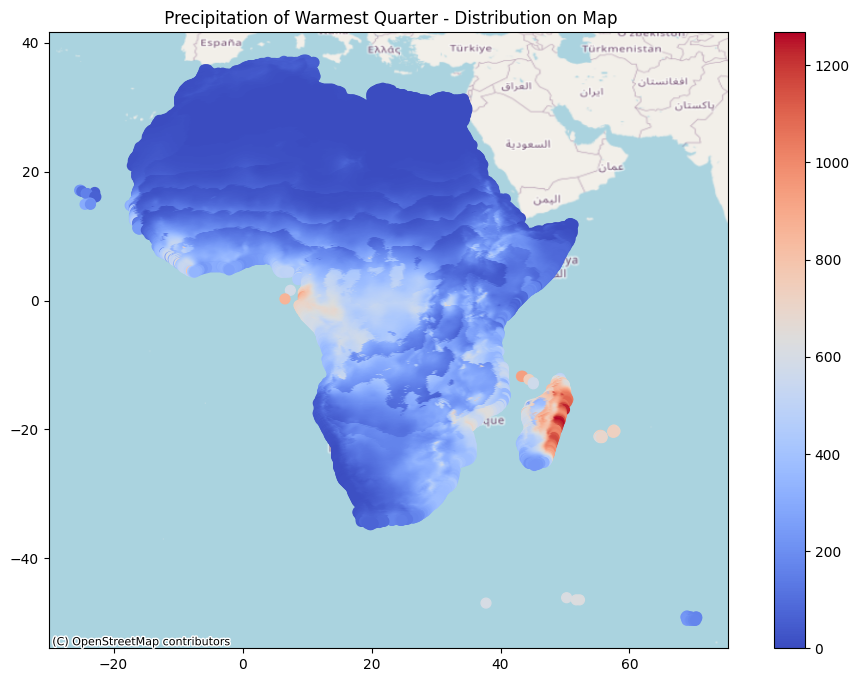

In [37]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_18.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_18'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio18 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio18 = africa_shp.to_crs(gdfbio18.crs)

# Spatial join to keep only points within Africa
africa_bio18 = gpd.sjoin(gdfbio18, africa_shp, how="inner", predicate="within")

print(africa_bio18.head())

# Convert DataFrame to GeoDataFrame
gdfbio18 = gpd.GeoDataFrame(africa_bio18, geometry=gpd.points_from_xy(africa_bio18['x'], africa_bio18['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio18.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio18.plot(column='bioclim_18', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio18.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' Precipitation of Warmest Quarter - Distribution on Map')

# Show the plot
plt.show()

# Bioclim 19 - Precipitation of the Coldest Quarter

               x          y  bioclim_19                  geometry  \
683696  9.416667  37.250000       315.0     POINT (9.41667 37.25)   
683697  9.583333  37.250000       295.0     POINT (9.58333 37.25)   
683698  9.750000  37.250000       274.0        POINT (9.75 37.25)   
683699  9.916667  37.250000       250.0     POINT (9.91667 37.25)   
685838  6.416667  37.083333       645.0  POINT (6.41667 37.08333)   

        index_right  OBJECTID  ISO   NAME_0 Continent REgion  
683696           51        52  TUN  Tunisia    Africa   None  
683697           51        52  TUN  Tunisia    Africa   None  
683698           51        52  TUN  Tunisia    Africa   None  
683699           51        52  TUN  Tunisia    Africa   None  
685838           13        14  DZA  Algeria    Africa   None  


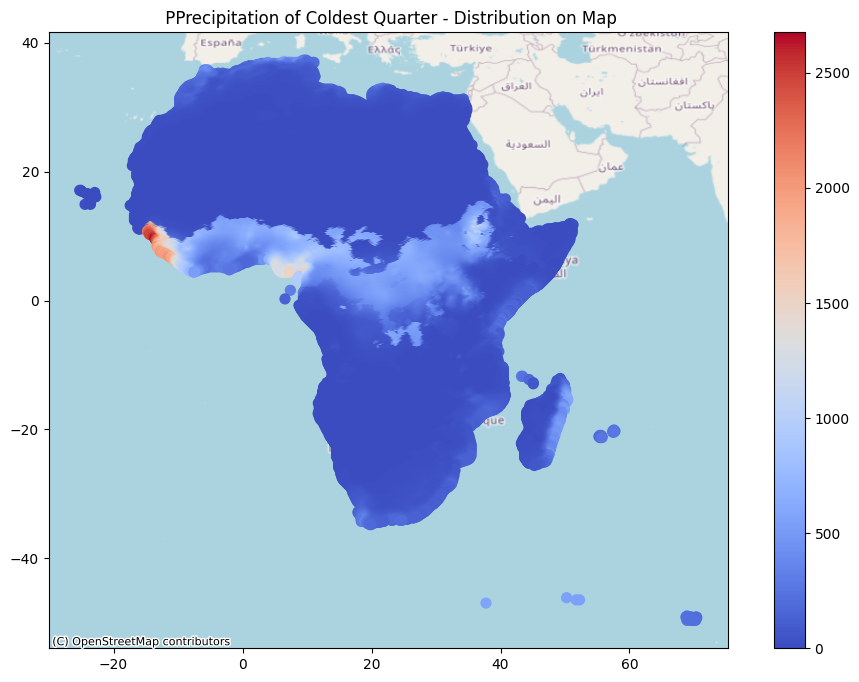

In [38]:
with rasterio.open('wc2.1_10m_bio/wc2.1_10m_bio_19.tif') as src:
    data = src.read()


    #get coord
    height = src.height
    width = src.width
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)


    # flatten the arrays
    data = data.reshape(-1, data.shape[0])
    xs = np.array(xs).flatten()
    ys = np.array(ys).flatten()
    
    df = pd.DataFrame({
    'x':xs,
    'y':ys
})

for i in range(data.shape[1]):
    df[f'bioclim_19'] = data[:, i]

df = df.dropna()

# Convert dataframe to GeoDataFrame
gdfbio19 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)


####################################################

# Load Africa shapefile (you need to have this file)
#africa_shp = gpd.read_file('Africa_Boundaries-shp/Africa_Boundaries.shp')

# Ensure both GeoDataFrames have the same CRS
africa_bio19 = africa_shp.to_crs(gdfbio19.crs)

# Spatial join to keep only points within Africa
africa_bio19 = gpd.sjoin(gdfbio19, africa_shp, how="inner", predicate="within")

print(africa_bio19.head())

# Convert DataFrame to GeoDataFrame
gdfbio19 = gpd.GeoDataFrame(africa_bio19, geometry=gpd.points_from_xy(africa_bio19['x'], africa_bio19['y']))

# Set the coordinate reference system (CRS) to WGS84
gdfbio19.set_crs(epsg=4326, inplace=True)


###################################################

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
gdfbio19.plot(column='bioclim_19', cmap='coolwarm', markersize=50, legend=True, ax=ax)

# Add basemap tiles
ctx.add_basemap(ax, crs=gdfbio19.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
plt.title(' PPrecipitation of Coldest Quarter - Distribution on Map')

# Show the plot
plt.show()